In [108]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df = pd.read_pickle("boston_housing.pkl")
print(df.head())  # Check if data is loaded correctly


       crim        zn     indus      chas       nox        rm       age  \
0 -0.789960  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.769755 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.769774 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.764946 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.730775 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        dis       rad       tax   ptratio         b     lstat      medv  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.345176  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  0.084104  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.266776  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.170822  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.373242  


# Handle missing values and outliers

In [111]:
# Check for missing values
print("Missing Values Before Handling:\n", df.isnull().sum())


Missing Values Before Handling:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


 - No missing values to handle

 ## **Handle Outliers**

Dataset shape before outlier removal: (506, 14)


/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


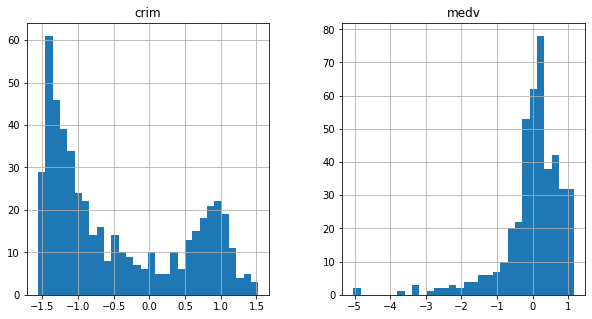

Dataset shape after outlier removal: (506, 14)


In [113]:
print(f"Dataset shape before outlier removal: {df.shape}")
# Apply log transformation to highly skewed variables
df['crim'] = np.log1p(df['crim'])  # log(1 + x) to handle zeros
df['medv'] = np.log1p(df['medv'])  # log transformation to reduce ceiling effect

# Check the transformed distributions
df[['crim', 'medv']].hist(figsize=(10, 5), bins=30)
plt.show()
print(f"Dataset shape after outlier removal: {df.shape}")


Final Summary Statistics:
              crim            zn         indus          chas           nox  \
count  506.000000  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean    -0.458785  3.306534e-16  2.804081e-16 -3.100287e-16 -8.071058e-16   
std      0.933094  1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00   
min     -1.560457 -4.877224e-01 -1.557842e+00 -2.725986e-01 -1.465882e+00   
25%     -1.269222 -4.877224e-01 -8.676906e-01 -2.725986e-01 -9.130288e-01   
50%     -0.850150 -4.877224e-01 -2.110985e-01 -2.725986e-01 -1.442174e-01   
75%      0.538686  4.877224e-02  1.015999e+00 -2.725986e-01  5.986790e-01   
max      1.527743  3.804234e+00  2.422565e+00  3.668398e+00  2.732346e+00   

                 rm           age           dis           rad           tax  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean  -5.189086e-17 -2.650493e-16  8.293761e-17  1.514379e-15 -9.934960e-16   
std    1.000990e+00  1.000990e+00  1.0009

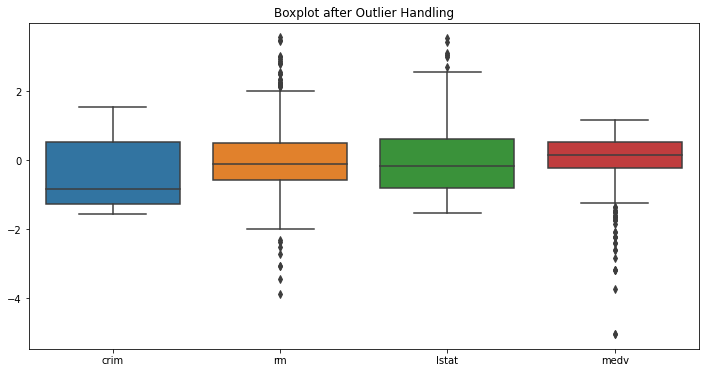

In [114]:
# Check for missing values and summary statistics
print("\nFinal Summary Statistics:\n", df.describe())

# Boxplot to check if outliers are reduced
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_with_outliers])
plt.title("Boxplot after Outlier Handling")
plt.show()

## **Encode categorical variables**
- No Categorical values to encode , the Boston Dataset has only numerical values

## **Normalize/standardize numerical features.**

In [117]:

from sklearn.preprocessing import StandardScaler

# Select numerical columns (excluding categorical ones)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())  # Check the transformed data



       crim        zn     indus      chas       nox        rm       age  \
0 -1.181835  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -1.083307 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -1.083395 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -1.061131 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.915522 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        dis       rad       tax   ptratio         b     lstat      medv  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.339119  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  0.085301  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  0.952967  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  0.902087  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.006959  


## **Split the data into training and testing sets.**

In [119]:
from sklearn.model_selection import train_test_split
# Define features (X) and target variable (y)
X = df.drop(columns=['medv'])  # Features (drop the target column)
y = df['medv']  # Target variable (house prices)

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print(f"Training set size: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set size: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set size: X_train: (404, 13), y_train: (404,)
Testing set size: X_test: (102, 13), y_test: (102,)


In [120]:
df.to_pickle("boston_housing.pkl")

In [121]:
df.head()
#df.shape

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-1.181835,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.339119
1,-1.083307,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,0.085301
2,-1.083395,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,0.952967
3,-1.061131,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,0.902087
4,-0.915522,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.006959


In [133]:
import os

# Define directory and filename
save_dir = "data"
save_path = os.path.join(save_dir, "processed_data.csv")

# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)

# Save the DataFrame as CSV
df.to_csv(save_path, index=False)

print(f"Processed data saved at: {save_path}")


Processed data saved at: data/processed_data.csv
